<a href="https://colab.research.google.com/github/purohitamann/market-anomaly-detection/blob/master/model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_auc_score


In [3]:

df = pd.read_csv('/content/FinancialMarketData.csv')

# Quick overview
print(df.shape)
df.head()


(1111, 44)


,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,1/11/2000,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,...,116.464,230.527,123.762,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,1/18/2000,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,...,117.267,231.377,123.762,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,1/25/2000,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,...,117.995,232.390,123.762,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2/1/2000,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,...,120.510,231.942,122.328,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2/8/2000,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,...,118.791,237.812,122.328,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32


In [4]:
df.rename(columns={'Data': 'date'}, inplace=True)

In [5]:
df.describe()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,...,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,0.213321,987.463744,0.036153,2259.860486,245.247670,90.934982,106.605734,1.569661,60.708101,19.992169,...,232.109985,704.379545,259.052717,1606.997102,107.877138,784.846292,1903.216436,648.681377,693.156616,53.933159
std,0.409837,494.623740,0.349453,2017.811888,68.278066,11.379095,12.840754,0.212344,25.900813,8.642157,...,109.917628,309.951757,75.934451,698.481956,20.795973,200.076443,986.468254,299.096020,405.527014,24.738356
min,0.000000,256.680000,-0.974000,291.000000,106.293000,71.329000,75.940000,1.172000,10.010000,9.430000,...,80.797000,230.527000,121.331000,663.690000,56.300000,431.710000,280.500000,151.250000,112.600000,13.460000
25%,0.000000,433.740000,-0.191000,990.000000,184.705550,81.240500,101.565000,1.418000,39.625000,13.640000,...,131.025000,434.661000,205.315500,1103.925000,90.605000,601.615000,1042.645000,463.195000,278.385000,28.565000
50%,0.000000,1137.800000,0.035000,1518.000000,234.560000,89.716000,108.720000,1.562000,57.400000,17.980000,...,213.205000,714.807000,264.770000,1324.430000,111.320000,786.830000,1860.960000,612.930000,691.530000,58.740000
75%,0.000000,1324.825000,0.260500,2685.500000,301.539500,97.404000,116.220000,1.677500,79.640000,23.625000,...,342.884500,939.824500,320.753000,1992.445000,126.470000,965.875000,2533.770000,793.620000,1014.750000,68.460000
max,1.000000,2006.910000,0.991000,11793.000000,467.570000,119.820000,134.630000,2.085000,140.970000,75.910000,...,431.552800,1286.353000,398.706500,4043.690000,146.390000,1210.580000,4721.360000,1617.640000,1730.510000,129.200000


In [6]:
df.head()

,Y,date,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,1/11/2000,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,...,116.464,230.527,123.762,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,1/18/2000,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,...,117.267,231.377,123.762,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,1/25/2000,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,...,117.995,232.390,123.762,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2/1/2000,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,...,120.510,231.942,122.328,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2/8/2000,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,...,118.791,237.812,122.328,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32


In [7]:
print(df['Y'].value_counts())



Y
0    874
1    237
Name: count, dtype: int64


In [8]:
df.rename(columns={'Y':'isCrash'}, inplace=True)

In [9]:
df.head()

,isCrash,date,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,1/11/2000,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,...,116.464,230.527,123.762,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,1/18/2000,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,...,117.267,231.377,123.762,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,1/25/2000,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,...,117.995,232.390,123.762,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2/1/2000,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,...,120.510,231.942,122.328,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2/8/2000,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,...,118.791,237.812,122.328,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32


In [10]:
df['isCrash'].value_counts()

,count
isCrash,
0,874
1,237


In [11]:
df.dropna()

,isCrash,date,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,1/11/2000,283.25,0.077,1388.0,157.2600,100.560,105.86,1.6460,25.77,...,116.4640,230.527,123.7620,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,1/18/2000,287.65,0.043,1405.0,165.0100,101.860,105.47,1.6380,28.85,...,117.2670,231.377,123.7620,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,1/25/2000,287.15,0.135,1368.0,167.2400,102.410,106.04,1.6500,28.28,...,117.9950,232.390,123.7620,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2/1/2000,282.75,0.191,1311.0,166.8500,104.920,107.85,1.6110,28.22,...,120.5100,231.942,122.3280,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2/8/2000,298.40,0.312,1277.0,165.4300,104.220,109.30,1.6110,28.02,...,118.7910,237.812,122.3280,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,0,3/23/2021,1727.96,0.339,2271.0,184.5022,92.336,108.72,1.3760,57.76,...,427.7972,1249.403,389.8500,3800.77,140.32,1199.57,1671.73,681.21,1695.96,110.83
1107,0,3/30/2021,1685.56,0.303,2103.0,184.8741,93.297,110.29,1.3719,60.55,...,428.6578,1242.264,385.8145,3835.96,142.76,1206.29,1635.57,693.38,1690.76,108.80
1108,0,4/6/2021,1743.28,0.440,2092.0,185.8393,92.335,109.88,1.3822,59.33,...,430.6649,1250.256,390.6819,3955.16,144.13,1194.62,1689.62,673.20,1689.48,111.92
1109,0,4/13/2021,1742.69,0.467,2140.0,188.1368,91.852,109.19,1.3737,60.18,...,430.4087,1252.563,390.3848,4027.05,144.23,1197.06,1680.82,680.23,1672.46,108.40


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   isCrash    1111 non-null   int64  
 1   date       1111 non-null   object 
 2   XAU BGNL   1111 non-null   float64
 3   ECSURPUS   1111 non-null   float64
 4   BDIY       1111 non-null   float64
 5   CRY        1111 non-null   float64
 6   DXY        1111 non-null   float64
 7   JPY        1111 non-null   float64
 8   GBP        1111 non-null   float64
 9   Cl1        1111 non-null   float64
 10  VIX        1111 non-null   float64
 11  USGG30YR   1111 non-null   float64
 12  GT10       1111 non-null   float64
 13  USGG2YR    1111 non-null   float64
 14  USGG3M     1111 non-null   float64
 15  US0001M    1111 non-null   float64
 16  GTDEM30Y   1111 non-null   float64
 17  GTDEM10Y   1111 non-null   float64
 18  GTDEM2Y    1111 non-null   float64
 19  EONIA      1111 non-null   float64
 20  GTITL30Y

In [13]:
df['VIX_MA_50'] = df['VIX'].rolling(window=50).mean()

In [14]:
df['VIX_MA_50']

,VIX_MA_50
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1106,26.7636
1107,26.4006
1108,25.8548
1109,25.5164


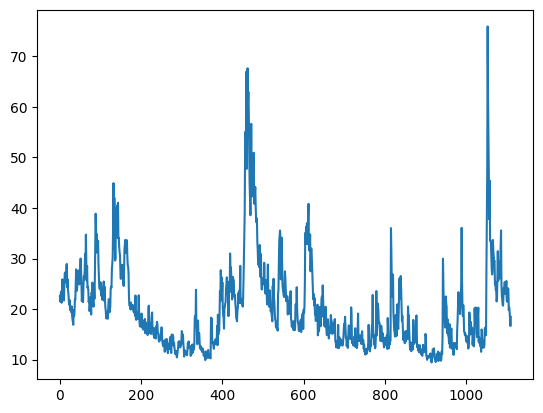

In [15]:
plt.plot(df['VIX'], label='VIX')

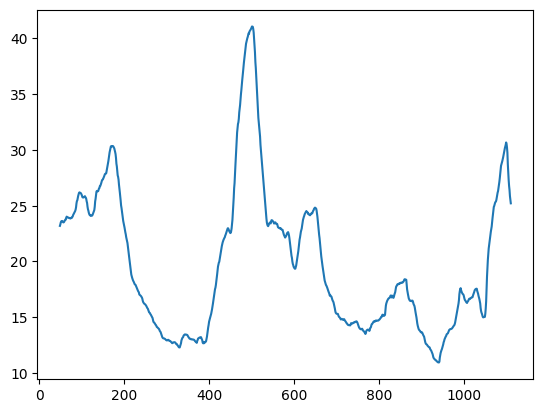

In [16]:
plt.plot(df['VIX_MA_50'], label='50-day MA')

In [17]:
df['VIX_dev'] = df['VIX'] - df['VIX_MA_50']

In [18]:
df['VIX_dev']

,VIX_dev
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1106,-6.4636
1107,-6.7906
1108,-7.7348
1109,-8.8664


In [19]:
from sklearn.model_selection import train_test_split


In [23]:

target = df['isCrash']
feature = df.drop('isCrash', axis=1)

In [33]:
feature['date'] = pd.to_datetime(feature['date'])
feature['Date_numeric'] = feature['date'].map(pd.Timestamp.toordinal)
feature = feature.drop('date', axis=1)

In [42]:

feature.drop('VIX_MA_50',axis=1)
feature.drop('VIX_dev',axis=1)
feature.dropna()

,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,...,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN,VIX_MA_50,VIX_dev,Date_numeric
49,269.80,-0.307,1588.0,195.6300,113.210,112.48,1.4640,29.33,27.17,5.4730,...,1242.73,131.70,815.57,757.35,151.25,181.78,23.94,23.1922,3.9778,730473
50,274.90,-0.298,1598.0,194.5200,110.310,113.65,1.4790,26.64,28.73,5.4320,...,1246.34,126.39,810.45,729.45,152.58,165.42,22.25,23.3168,5.4132,730480
51,269.80,-0.218,1599.0,192.9200,108.610,114.50,1.4990,27.21,29.99,5.3420,...,1216.76,127.20,809.54,761.09,155.16,175.24,22.58,23.4866,6.5034,730487
52,267.60,-0.430,1593.0,195.8200,109.520,116.67,1.4890,27.64,27.99,5.4290,...,1233.25,125.89,803.34,819.00,161.56,180.12,24.00,23.5860,4.4040,730494
53,263.30,-0.434,1579.0,198.5300,110.110,117.37,1.4680,30.29,25.28,5.5960,...,1259.71,126.11,801.73,812.25,180.05,176.28,24.83,23.6226,1.6574,730501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,1727.96,0.339,2271.0,184.5022,92.336,108.72,1.3760,57.76,20.30,2.3264,...,3800.77,140.32,1199.57,1671.73,681.21,1695.96,110.83,26.7636,-6.4636,737872
1107,1685.56,0.303,2103.0,184.8741,93.297,110.29,1.3719,60.55,19.61,2.3687,...,3835.96,142.76,1206.29,1635.57,693.38,1690.76,108.80,26.4006,-6.7906,737879
1108,1743.28,0.440,2092.0,185.8393,92.335,109.88,1.3822,59.33,18.12,2.3230,...,3955.16,144.13,1194.62,1689.62,673.20,1689.48,111.92,25.8548,-7.7348,737886
1109,1742.69,0.467,2140.0,188.1368,91.852,109.19,1.3737,60.18,16.65,2.2939,...,4027.05,144.23,1197.06,1680.82,680.23,1672.46,108.40,25.5164,-8.8664,737893


In [57]:
feature.dropna()

,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,...,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN,VIX_MA_50,VIX_dev,Date_numeric
49,269.80,-0.307,1588.0,195.6300,113.210,112.48,1.4640,29.33,27.17,5.4730,...,1242.73,131.70,815.57,757.35,151.25,181.78,23.94,23.1922,3.9778,730473
50,274.90,-0.298,1598.0,194.5200,110.310,113.65,1.4790,26.64,28.73,5.4320,...,1246.34,126.39,810.45,729.45,152.58,165.42,22.25,23.3168,5.4132,730480
51,269.80,-0.218,1599.0,192.9200,108.610,114.50,1.4990,27.21,29.99,5.3420,...,1216.76,127.20,809.54,761.09,155.16,175.24,22.58,23.4866,6.5034,730487
52,267.60,-0.430,1593.0,195.8200,109.520,116.67,1.4890,27.64,27.99,5.4290,...,1233.25,125.89,803.34,819.00,161.56,180.12,24.00,23.5860,4.4040,730494
53,263.30,-0.434,1579.0,198.5300,110.110,117.37,1.4680,30.29,25.28,5.5960,...,1259.71,126.11,801.73,812.25,180.05,176.28,24.83,23.6226,1.6574,730501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,1727.96,0.339,2271.0,184.5022,92.336,108.72,1.3760,57.76,20.30,2.3264,...,3800.77,140.32,1199.57,1671.73,681.21,1695.96,110.83,26.7636,-6.4636,737872
1107,1685.56,0.303,2103.0,184.8741,93.297,110.29,1.3719,60.55,19.61,2.3687,...,3835.96,142.76,1206.29,1635.57,693.38,1690.76,108.80,26.4006,-6.7906,737879
1108,1743.28,0.440,2092.0,185.8393,92.335,109.88,1.3822,59.33,18.12,2.3230,...,3955.16,144.13,1194.62,1689.62,673.20,1689.48,111.92,25.8548,-7.7348,737886
1109,1742.69,0.467,2140.0,188.1368,91.852,109.19,1.3737,60.18,16.65,2.2939,...,4027.05,144.23,1197.06,1680.82,680.23,1672.46,108.40,25.5164,-8.8664,737893


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



X_train,X_test,y_train,y_test = train_test_split(feature,target,test_size=0.2,random_state=42)
scaler = StandardScaler()


In [59]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [64]:
# Check for NaN values in y_train
print(y_train.isnull().sum())

# Drop rows with NaN in y_train (if NaNs are few)
X_train = X_train[y_train.notna()]
y_train = y_train.dropna()


0


In [65]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [67]:
iso_forest = IsolationForest(
    n_estimators=100,       # Number of trees
    max_samples='auto',     # Default: subset size = min(256, len(X))
    contamination=0.1,      # Approximate proportion of outliers
    random_state=42
)


In [81]:
iso_forest.fit(X_train,y_train)


IsolationForest(contamination=0.1, random_state=42)

In [82]:
# Predict anomalies on the same dataset or new data
predictions = iso_forest.predict(X_test_scaled)  # Predict anomalies

# Convert to 0 (normal) and 1 (anomalies) for clarity
predictions = [1 if pred == -1 else 0 for pred in predictions]


In [83]:
len(predictions)

223

In [84]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


[[160  17]
 [ 44   2]]
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       177
           1       0.11      0.04      0.06        46

    accuracy                           0.73       223
   macro avg       0.44      0.47      0.45       223
weighted avg       0.64      0.73      0.68       223



In [86]:

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,predictions)

0.726457399103139

In [ ]:
 model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  print(f"{model.__class__.__name__} Acccuracy: {accuracy:.4f}")
  print(f"\nClassification Report:\n{classification_report(y_test,y_pred)}")
  print("-------")